# TO DO
- Change file paths to placeholders
- Fill in citation + info in intro

# Introduction

lumos-ncpt-tools is a Python package for working with data from the NeuroCognitive Performance Test (NCPT; Lumos Labs, Inc.). The NCPT is [###]. A large NCPT dataset was made public in conjunction with a Data Descriptor publication: [PLACEHOLDER]. <br>

Data are freely available at [PLACEHOLDER]. 


# Citation
If you use this code, please using the following citation:
[INCOMPLETE]

# Dependencies

# Quick Start Guide
The easiest way to get started is to fork this repo and install Poetry:

Download the data: 

Change paths: 

# Demo 

### 1) Load up some data! 
- Instantiate a NCPT class object with data from one test battery
- Display some summary info on the entire dataset
- Display info about the subtests in the battery

### 2) Process and plot the scores 
- Filter out outlier raw scores
- Plot the raw score distributions before and after outlier removal
- Lookup normalized scores and the Grand Index (a composite score)
- Plot the normalized scores vs. age

### 3) Miscellaneous 
- Show the meaning of the numeric education levels 
- Filter out users who did not complete the test battery
- Save the filtered/augmented dataset (now has normed scores)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lumos_ncpt_tools.ncpt import NCPT
from lumos_ncpt_tools.utils import load_data

## 1) Load up some data

In [2]:
# Load all of the data from one test battery
battery_id = 39
#data_directory = 'CHANGE/TO/DATA/DIRECTORY' 
#save_path = 'CHANGE/TO/SAVE/PATH' # For filtered/processed dataset
data_directory = '/mnt/efs/home/paul/ncpt_data_descriptor/split_by_battery' # CHANGE
save_path = '/mnt/efs/home/paul/ncpt_data_descriptor/demo_df.csv' # CHANGE
data_fn = f'battery{battery_id}_df.csv'
df = load_data(data_directory, data_fn)

# Instantiate a NCPT object, display some basic info
ncpt = NCPT(df)
del df
ncpt.report_stats()
ncpt.get_subtest_info()

Data summary
------------
N users: 236585
N tests: 236585
N subtests: 1770413
DataFrame columns: ['user_id', 'age', 'gender', 'education_level', 'country', 'user_type', 'test_run_id', 'battery_id', 'specific_subtest_id', 'raw_score', 'general_subtest_id']

Subtest information
-------------------
Subtest ID 28: forward_span, v2, N scores = 226451
Subtest ID 29: arithmetic, v2, N scores = 236585
Subtest ID 30: grammatical_reasoning, v2, N scores = 213682
Subtest ID 31: progressive_matrices, v1, N scores = 212448
Subtest ID 33: reverse_span, v2, N scores = 218320
Subtest ID 38: digit_symbol_coding, v1, N scores = 232563
Subtest ID 39: trail_making_A, v1, N scores = 215734
Subtest ID 40: trail_making_B, v1, N scores = 214630



## 2) Process and plot the scores

### Check for outliers

Subtest ID 33: N outliers = 30


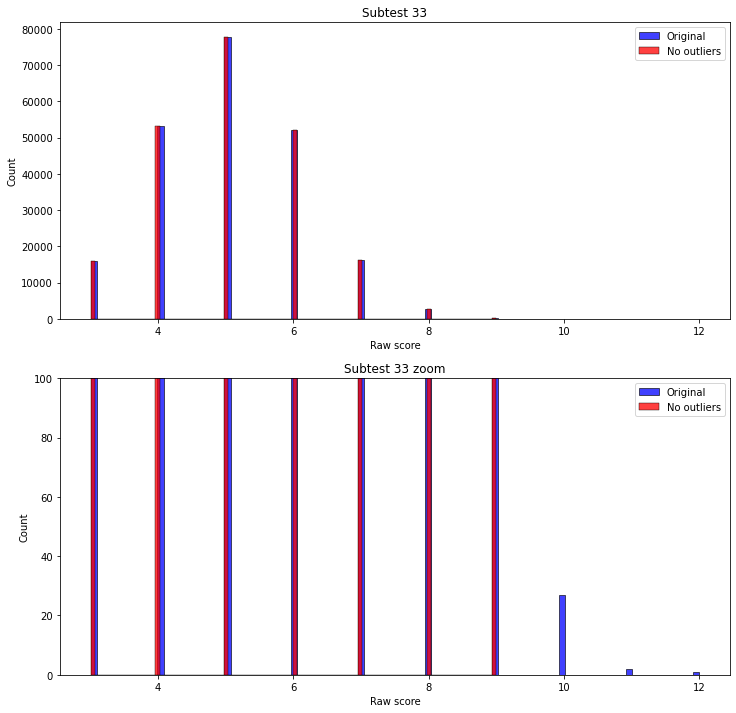

In [3]:
# Remove outlier raw scores using the median absolute deviation (MAD) method
# Note: Depending on the intended application, this may or may not be a sensible thing to do.
outlier_threshold = 5 # fairly conservative threshold
outlier_method = 'MAD'
n_bins = 100
outlier_subtests = [33]
zoom_ylim = [0, 100]
filt_df = ncpt.filter_outliers_by_subtest('raw_score', outlier_threshold, 
                                          outlier_subtests, method=outlier_method)

# Plot the raw score distributions before and after outlier removal
for sub in outlier_subtests:
    orig_sub_df = ncpt.df.query('specific_subtest_id == @sub')
    filt_sub_df = filt_df.query('specific_subtest_id == @sub')
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    for ax_ind, ax in enumerate(axes):
        sns.histplot(orig_sub_df['raw_score'], color='b', bins=n_bins, kde=False, ax=ax, label='Original')
        sns.histplot(filt_sub_df['raw_score'], color='r', bins=n_bins, kde=False, ax=ax, label='No outliers')
        ax.set_xlabel('Raw score')
        ax.set_ylabel('Count')
        ax.legend()
        if ax_ind == 1:
            ax.set_ylim(zoom_ylim)
            ax.set_title(f'Subtest {sub} zoom')
        else:
            ax.set_title(f'Subtest {sub}')
    plt.show()


### Look up normalized scores

Looking up norms...
Done! Added normalized scores in column rank_INT_normed_score
Adding grand index...
Looking up norms...
Done! Added normalized scores in column census_rank_INT_normed_score
Done! Added composite score in column grand_index
---------------------------
Subtest 29
Mean of normed scores: 101.45746464305039
Std. dev. of normed scores: 15.484191945088131


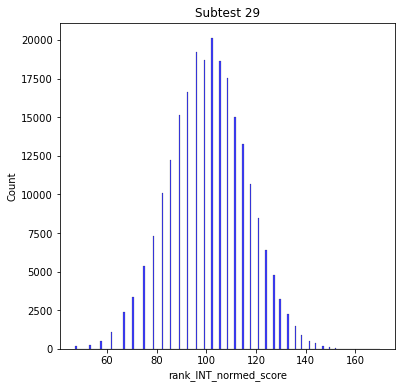

Subtest 39
Mean of normed scores: 100.51704031012781
Std. dev. of normed scores: 14.86754440575909


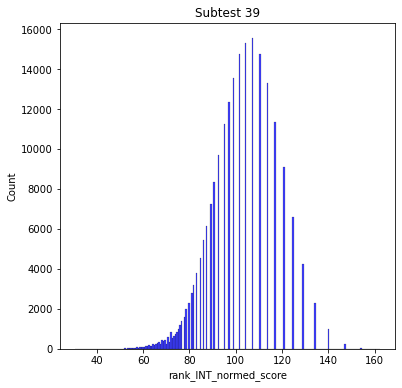

Subtest 40
Mean of normed scores: 100.99300863445565
Std. dev. of normed scores: 14.975940157357572


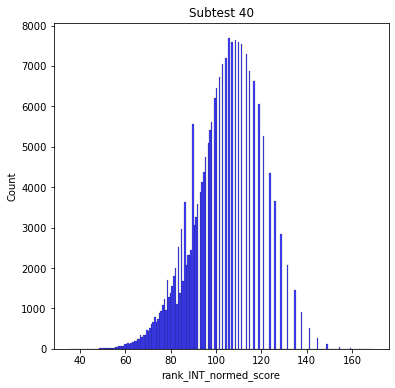

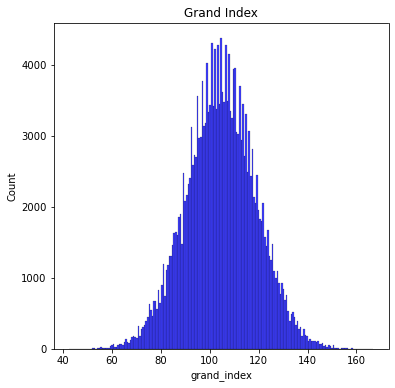

Mean Grand Index: 104.56647558396408
Std. dev. of Grand Index: 14.26543660612769


In [4]:
# Lookup normalized scores using the 'rank_INT' method (see paper for details)
# Also lookup the Grand Index: scores are first normalized using the 'census_rank_INT' method (see paper)
norm_method = 'rank_INT'
score_col = f'{norm_method}_normed_score'
subtests_to_plot = [29]

ncpt.lookup_normed_scores(norm_method)
ncpt.add_grand_index()
print('---------------------------')

# Plot the normalized score distributions
subtests = ncpt.df['specific_subtest_id'].unique()
for sub in subtests_to_plot:
    sub_df = ncpt.df.query('specific_subtest_id == @sub')
    print(f'Subtest {sub}')
    print(f"Mean of normed scores: {sub_df[score_col].mean()}")
    print(f"Std. dev. of normed scores: {sub_df[score_col].std()}")
    fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    sns.histplot(sub_df[score_col], color='b', kde=False, ax=axes)
    axes.set_title(f'Subtest {sub}')
    plt.show()
                 
# Plot the distribution of the Grand Index
GI_df = ncpt.df.drop_duplicates(subset=['test_run_id'])
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
sns.histplot(GI_df['grand_index'], color='b', kde=False, ax=axes)
axes.set_title(f'Grand Index')
plt.show()

# Stats
print(f"Mean Grand Index: {GI_df['grand_index'].mean()}")
print(f"Std. dev. of Grand Index: {GI_df['grand_index'].std()}")

### Plot the Grand Index vs. age
- Red line is best linear fit

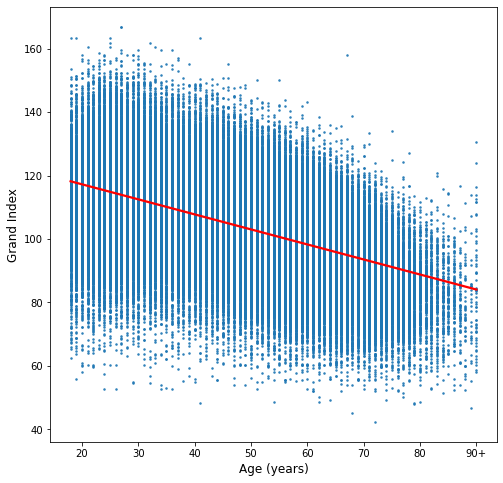

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
fontsize = 12
sns.regplot(x='age', y='grand_index', data=GI_df, ax=axes, marker='.', 
            scatter_kws={'s': 10}, line_kws={'color': 'r'})
axes.set_xlabel('Age (years)', fontsize=fontsize)
axes.set_ylabel('Grand Index', fontsize=fontsize)
axes.set_xticks([20, 30, 40, 50, 60, 70, 80, 90])
axes.set_xticklabels(['20', '30', '40', '50', '60', '70', '80', '90+'])
plt.show()

## 3) Miscellaneous

In [6]:
# Display the meaning of the numeric education levels
ncpt.get_education_info()

# Filter out users who did not complete the test battery
filt_df, exclude_df = ncpt.filter_by_completeness()
print(f'Filtered out {len(exclude_df)} subtests \n')

# Save the filtered/augmented dataset (now has normed scores)
ncpt.save_df(save_path)

Key for education levels
------------------------
1: Some high school
2: High school diploma / GED
3: Some college
4: College degree
5: Professional degree
6: Master's degree
7: Ph.D.
8: Associate's degree
99: Other

Filtered out 70829 subtests 

Saved data to /mnt/efs/home/paul/ncpt_data_descriptor/demo_df.csv
